Импортируем библиотеки

In [63]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix , classification_report
import matplotlib.pyplot as plt
import numpy as np
import cv2

import time
from sklearn import metrics

## Препроцессинг данных

In [64]:
#Получаем матрицы с датасета cifar10
(X_trainRGB, y_train), (X_testRGB, y_test) = datasets.cifar10.load_data()

In [65]:
X_trainRGB

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [66]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

#### Переводим классы из двухмерного в одномерный массив

Для тренировочных данных классов

In [67]:
y_train.shape

(50000, 1)

In [68]:
y_train = y_train.reshape(-1,)

In [69]:
y_train.shape

(50000,)

Для тестовых данных классов

In [70]:
y_test.shape

(10000, 1)

In [71]:
y_test = y_test.reshape(-1,)

In [72]:
y_test.shape

(10000,)

#### Переводим изображения в черно-белые для последующей передачи в sklearn

In [73]:
def show_image(img):
    plt.figure(figsize = (32,2))
    plt.imshow(img)

Работаем с x_train

In [74]:
X_trainRGB.shape

(50000, 32, 32, 3)

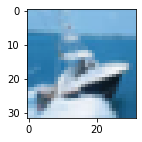

In [75]:
show_image(X_trainRGB[8])

In [76]:
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_trainRGB])

In [77]:
X_train.shape

(50000, 32, 32)

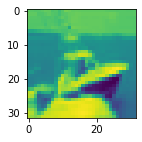

In [78]:
show_image(X_train[8])

In [79]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])

In [80]:
X_train.shape

(50000, 1024)

Работаем с X_test

In [81]:
X_testRGB.shape

(10000, 32, 32, 3)

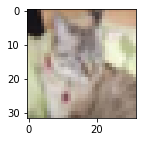

In [82]:
show_image(X_testRGB[8])

In [83]:
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_testRGB])

In [84]:
X_test.shape

(10000, 32, 32)

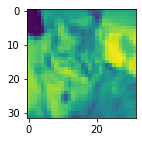

In [85]:
show_image(X_test[8])

In [86]:
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

In [87]:
X_test.shape

(10000, 1024)

#### Нормализация изображений

Для чёрно-белых изображений

In [89]:
X_train[1]

array([177, 135, 101, ..., 136, 137, 137], dtype=uint8)

In [90]:
X_train  = X_train/255
X_test  = X_test/255

In [91]:
X_train[1]

array([0.69411765, 0.52941176, 0.39607843, ..., 0.53333333, 0.5372549 ,
       0.5372549 ])

Для RGB

In [93]:
X_trainRGB[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

In [94]:
X_trainRGB  = X_trainRGB/255
X_testRGB  = X_testRGB/255

In [95]:
X_trainRGB[1]

array([[[0.60392157, 0.69411765, 0.73333333],
        [0.49411765, 0.5372549 , 0.53333333],
        [0.41176471, 0.40784314, 0.37254902],
        ...,
        [0.35686275, 0.37254902, 0.27843137],
        [0.34117647, 0.35294118, 0.27843137],
        [0.30980392, 0.31764706, 0.2745098 ]],

       [[0.54901961, 0.62745098, 0.6627451 ],
        [0.56862745, 0.6       , 0.60392157],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.37647059, 0.38823529, 0.30588235],
        [0.30196078, 0.31372549, 0.24313725],
        [0.27843137, 0.28627451, 0.23921569]],

       [[0.54901961, 0.60784314, 0.64313725],
        [0.54509804, 0.57254902, 0.58431373],
        [0.45098039, 0.45098039, 0.43921569],
        ...,
        [0.30980392, 0.32156863, 0.25098039],
        [0.26666667, 0.2745098 , 0.21568627],
        [0.2627451 , 0.27058824, 0.21568627]],

       ...,

       [[0.68627451, 0.65490196, 0.65098039],
        [0.61176471, 0.60392157, 0.62745098],
        [0.60392157, 0

## Работа с в sklearn

Реализация "классических" алогритмов с помощью библиотеки sklearn.<br>Обработка матриц проходит только на CPU, так что надо ОЧЕНЬ долго пождождать

In [20]:
# Реализация метода опорных векторов через SVC
from sklearn import svm

start_time = time.time()
nb = svm.SVC().fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Время выполнения", (time.time()-start_time))

              precision    recall  f1-score   support

           0       0.50      0.47      0.49      1000
           1       0.55      0.54      0.55      1000
           2       0.35      0.32      0.33      1000
           3       0.33      0.28      0.30      1000
           4       0.36      0.44      0.40      1000
           5       0.47      0.37      0.42      1000
           6       0.44      0.55      0.49      1000
           7       0.55      0.47      0.51      1000
           8       0.53      0.60      0.56      1000
           9       0.51      0.56      0.53      1000

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.46     10000
weighted avg       0.46      0.46      0.46     10000

Время выполнения 2039.4892559051514


In [19]:
#Реализация наивного байесовского метода
from sklearn.naive_bayes import MultinomialNB

start_time = time.time()
nb = MultinomialNB().fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Время выполнения", (time.time()-start_time))

              precision    recall  f1-score   support

           0       0.18      0.11      0.13      1000
           1       0.30      0.15      0.20      1000
           2       0.33      0.15      0.21      1000
           3       0.20      0.06      0.10      1000
           4       0.20      0.17      0.18      1000
           5       0.19      0.44      0.27      1000
           6       0.20      0.08      0.12      1000
           7       0.18      0.23      0.21      1000
           8       0.25      0.40      0.31      1000
           9       0.30      0.51      0.37      1000

    accuracy                           0.23     10000
   macro avg       0.23      0.23      0.21     10000
weighted avg       0.23      0.23      0.21     10000

Время выполнения 0.3874680995941162


In [19]:
# Реализация метода k-ближайших соседей
import sklearn.neighbors as neigh

start_time = time.time()
kn = neigh.KNeighborsClassifier(n_neighbors=90, n_jobs=6).fit(X_train,y_train)
y_pred = kn.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Время выполнения", (time.time()-start_time))

              precision    recall  f1-score   support

           0       0.36      0.36      0.36      1000
           1       0.84      0.07      0.13      1000
           2       0.23      0.35      0.28      1000
           3       0.33      0.06      0.10      1000
           4       0.18      0.59      0.27      1000
           5       0.58      0.13      0.21      1000
           6       0.27      0.24      0.25      1000
           7       0.65      0.14      0.23      1000
           8       0.29      0.67      0.40      1000
           9       0.65      0.14      0.23      1000

    accuracy                           0.28     10000
   macro avg       0.44      0.28      0.25     10000
weighted avg       0.44      0.28      0.25     10000

Время выполнения 16.37787103652954


In [ ]:
# Реализация метода опорных векторов через LinearSVC
start_time = time.time()
import sklearn.svm as svm
svect = svm.LinearSVC(max_iter=5000).fit(X_train, y_train)
y_pred = svect.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Время выполнения", (time.time()-start_time))

In [18]:
# Реализация логистической регресси
from sklearn.linear_model import LogisticRegression

start_time = time.time()
logr = LogisticRegression(max_iter=5000, n_jobs=6).fit(X_train, y_train)
y_pred = logr.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Время выполнения", (time.time()-start_time))

              precision    recall  f1-score   support

           0       0.34      0.36      0.35      1000
           1       0.33      0.35      0.34      1000
           2       0.22      0.19      0.21      1000
           3       0.20      0.16      0.18      1000
           4       0.21      0.18      0.20      1000
           5       0.27      0.27      0.27      1000
           6       0.25      0.28      0.27      1000
           7       0.28      0.27      0.28      1000
           8       0.33      0.38      0.36      1000
           9       0.36      0.41      0.39      1000

    accuracy                           0.29     10000
   macro avg       0.28      0.29      0.28     10000
weighted avg       0.28      0.29      0.28     10000

Время выполнения 228.5255832672119


/Users/demg/miniforge3/envs/env_tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Реализация в keras

Реализация классификатора с использованием алгоритмов глубокого обучения ANN и CNN

In [96]:
from keras.utils.vis_utils import plot_model
import visualkeras
import pandas as pd
import numpy as np

#### Строим простую ANN (artificial neural network)

In [99]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

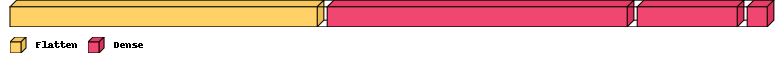

In [100]:
visualkeras.layered_view(ann, legend=True) 

In [101]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 3000)              9219000   
                                                                 
 dense_4 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_5 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [102]:
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [103]:
ann.fit(X_trainRGB, y_train, epochs=10)

Epoch 1/10


2022-04-05 00:46:58.994458: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-05 00:46:59.095163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 17s 11ms/step - loss: 1.8132 - accuracy: 0.3528
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6249 - accuracy: 0.4264
Epoch 3/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.5416 - accuracy: 0.4557
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4818 - accuracy: 0.4788
Epoch 5/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.4320 - accuracy: 0.4958
Epoch 6/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.3920 - accuracy: 0.5122
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3533 - accuracy: 0.5227
Epoch 8/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.3189 - accuracy: 0.5361
Epoch 9/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2838 - accuracy: 0.5469
Epoch 10/10
1563/1563 [==============================] - 17s 11ms/step - lo

In [105]:
y_pred = ann.predict(X_testRGB)
y_pred_classes = [np.argmax(element) for element in y_pred]

print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.62      0.54      0.58      1000
           1       0.70      0.47      0.56      1000
           2       0.46      0.32      0.38      1000
           3       0.47      0.15      0.23      1000
           4       0.45      0.43      0.44      1000
           5       0.48      0.36      0.42      1000
           6       0.42      0.75      0.54      1000
           7       0.61      0.54      0.57      1000
           8       0.73      0.57      0.64      1000
           9       0.36      0.83      0.50      1000

    accuracy                           0.50     10000
   macro avg       0.53      0.50      0.49     10000
weighted avg       0.53      0.50      0.49     10000



Как видим из отчета, точность классификации составляет 50%, что уже неплохо

In [106]:
print(confusion_matrix(y_test, y_pred_classes))

[[543  29  35   4  47   7  48  13  86 188]
 [ 15 468   6   6   3  10  25  16  23 428]
 [ 85  14 318  27 136  66 209  63  13  69]
 [ 26  18  64 154  81 174 253  54  16 160]
 [ 42   9  98  17 426  25 234  69  13  67]
 [ 17   5  78  80  85 365 158  84  17 111]
 [  3  12  33  15  61  27 754  15   9  71]
 [ 24   9  39  17  69  47  66 535   7 187]
 [100  37  11   7  24  21  21   7 571 201]
 [ 14  63   4   4   8  15  21  15  25 831]]


#### Строим cвёрточную нейронную сеть (CNN)

In [107]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

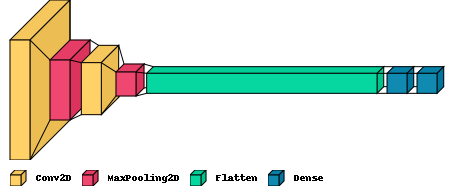

In [108]:
visualkeras.layered_view(cnn, legend=True) 

In [109]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [110]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [111]:
cnn.fit(X_trainRGB, y_train, epochs=20)

Epoch 1/20
   5/1563 [..............................] - ETA: 21s - loss: 2.2978 - accuracy: 0.1000     

2022-04-05 00:50:00.210987: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 16s 10ms/step - loss: 1.4634 - accuracy: 0.4706
Epoch 2/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0994 - accuracy: 0.6147
Epoch 3/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9653 - accuracy: 0.6645
Epoch 4/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8827 - accuracy: 0.6913
Epoch 5/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8179 - accuracy: 0.7150
Epoch 6/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7619 - accuracy: 0.7343
Epoch 7/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7166 - accuracy: 0.7492
Epoch 8/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6725 - accuracy: 0.7635
Epoch 9/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6399 - accuracy: 0.7763
Epoch 10/20
1563/1563 [==============================] - 16s 10ms/step - lo

In [112]:
y_pred = cnn.predict(X_testRGB)
y_pred_classes = [np.argmax(element) for element in y_pred]

print(classification_report(y_test, y_pred_classes))

2022-04-05 00:55:16.823573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

           0       0.74      0.68      0.71      1000
           1       0.81      0.76      0.78      1000
           2       0.60      0.56      0.58      1000
           3       0.47      0.59      0.52      1000
           4       0.63      0.59      0.61      1000
           5       0.66      0.55      0.60      1000
           6       0.73      0.77      0.75      1000
           7       0.67      0.79      0.73      1000
           8       0.87      0.72      0.79      1000
           9       0.72      0.80      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [113]:
print(confusion_matrix(y_test, y_pred_classes))

[[683  21  89  34  19  11  18  33  42  50]
 [ 24 761   6  14   6   5  18  10  17 139]
 [ 56   5 560  93  86  50  70  57  11  12]
 [ 16  12  59 587  71 112  65  47  10  21]
 [ 17   5  80  92 588  38  58 116   2   4]
 [  7   6  41 241  44 550  24  75   3   9]
 [  8   3  41  95  44  19 770   9   4   7]
 [  6   8  30  50  50  41  10 793   0  12]
 [ 82  47  21  28  11   6  13  17 719  56]
 [ 28  73   6  21   7   6  11  28  16 804]]


## Смотрим на результаты

In [114]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [115]:
def plot_sample(x_images, y_test, y_model_pred, index):
    

    plt.figure(figsize = (32,2))
    plt.imshow(x_images[index])

    plt.title(classes[y_test[index]],fontsize=14)
    plt.xlabel(f"Модель думает это {classes[y_model_pred[index]]}",fontsize=14)

In [116]:
y_test.shape

(10000,)

In [117]:
y_pred_classes = np.array(y_pred_classes)
y_pred_classes.shape

(10000,)

Индексы тех изображений, которые определились неправильно

In [118]:
false_detection_indexes = np.where(y_pred_classes-y_test != 0)[0]
false_detection_indexes.shape

(3185,)

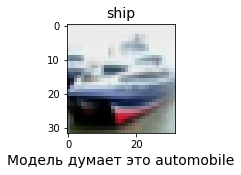

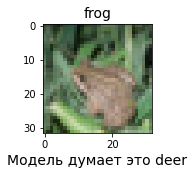

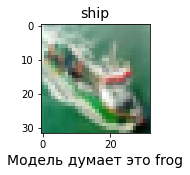

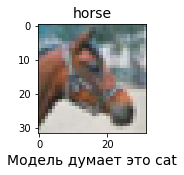

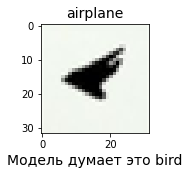

In [119]:
for index in false_detection_indexes[:5]:
    plot_sample(X_testRGB, y_test, y_pred_classes, index)

In [120]:
true_detection_indexes = np.where(y_pred_classes-y_test == 0)[0]
true_detection_indexes.shape

(6815,)

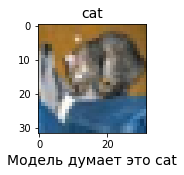

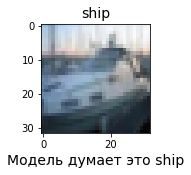

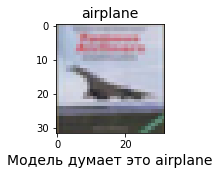

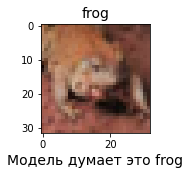

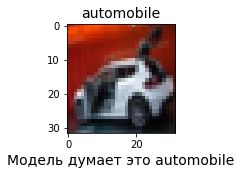

In [121]:
for index in true_detection_indexes[:5]:
    plot_sample(X_testRGB, y_test, y_pred_classes, index)